**Part I) Consider two independent Poisson random variables X and Y , with parameters λX := 3 and λY := 4.
Define a random variable Z := X + Y , having a probability mass function (PMF) P(Z).**

**(i) Empirically obtain an estimate Pb(Z) of the PMF P(Z), by drawing N := 10^6 instances (sample points) of X and Y both. You may use the poissrnd(.) function in Matlab. Report the values of Pb(Z = k) for k = 0, 1, 2, · · · , 25.**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *
np.random.seed(0)

In [4]:
X_samples = np.random.poisson(lam=3, size=10**6)
Y_samples = np.random.poisson(lam=4, size=10**6)
Z_samples = X_samples + Y_samples

In [5]:
count = dict()

for i in range(26):
    count[i] = 0
    
for z in Z_samples:
    count[z] +=1
    
for i in range(26):
    count[i] = count[i]/(10**6)

In [51]:
count

{0: 0.000907,
 1: 0.006343,
 2: 0.02247,
 3: 0.052054,
 4: 0.091321,
 5: 0.127452,
 6: 0.148828,
 7: 0.148973,
 8: 0.131213,
 9: 0.100854,
 10: 0.071002,
 11: 0.045034,
 12: 0.026456,
 13: 0.014272,
 14: 0.007183,
 15: 0.003217,
 16: 0.001447,
 17: 0.000611,
 18: 0.000251,
 19: 7.9e-05,
 20: 2.3e-05,
 21: 6e-06,
 22: 4e-06,
 23: 0.0,
 24: 0.0,
 25: 0.0}

In [52]:
report = pd.DataFrame()
report['z'] = count.keys()
report['Estimated P(Z)'] = count.values()
report

,z,Estimated P(Z)
0,0,0.000907
1,1,0.006343
2,2,0.022470
3,3,0.052054
4,4,0.091321
5,5,0.127452
6,6,0.148828
7,7,0.148973
8,8,0.131213
9,9,0.100854


**(ii) What will the PMF P(Z) be theoretically/analytically ?**

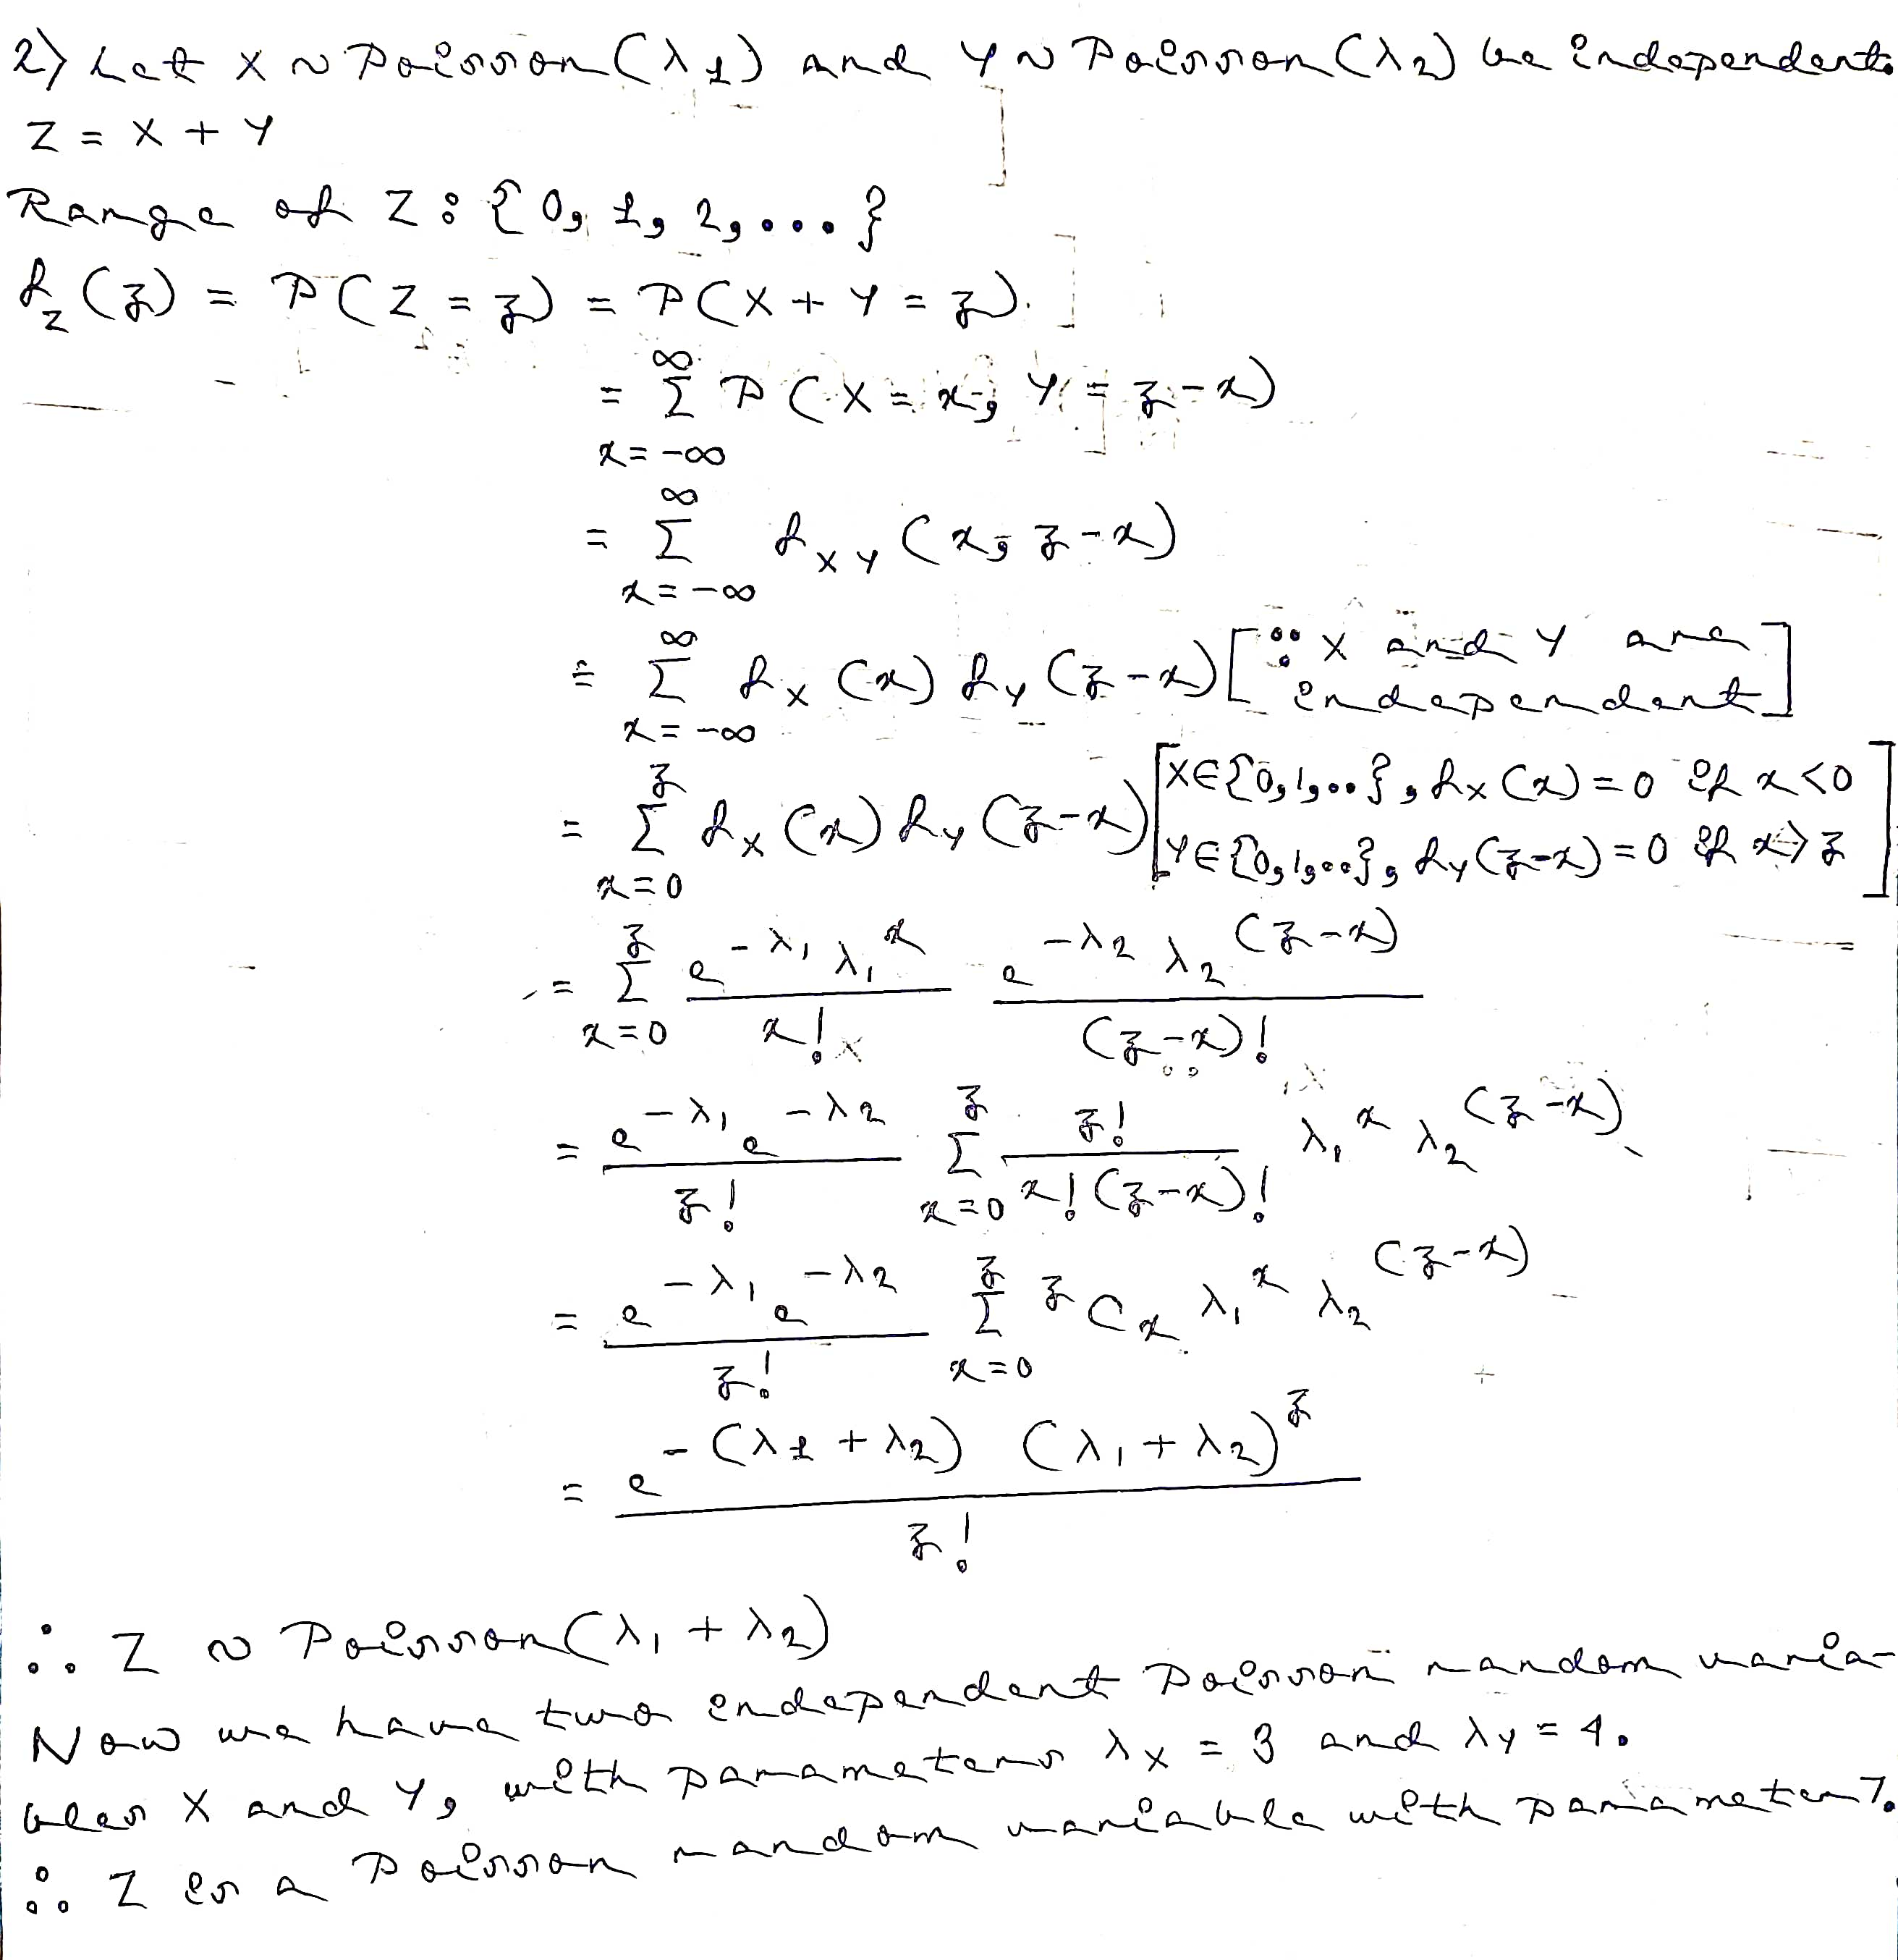

**(iii) Show and compare the values for Pb(Z = k) and P(Z = k) for k = 0, 1, 2, · · · , 25.**

In [54]:
def Poisson(x,l):
    return (exp(-l)*(l**x))/factorial(x)

In [55]:
distribution = {}
for x in range(0,26):
    distribution[x]= Poisson(x,7)

In [56]:
report['P(Z)'] = distribution.values()
report

,z,Estimated P(Z),P(Z)
0,0,0.000907,9.118820e-04
1,1,0.006343,6.383174e-03
2,2,0.022470,2.234111e-02
3,3,0.052054,5.212925e-02
4,4,0.091321,9.122619e-02
5,5,0.127452,1.277167e-01
6,6,0.148828,1.490028e-01
7,7,0.148973,1.490028e-01
8,8,0.131213,1.303774e-01
9,9,0.100854,1.014047e-01


In [57]:
report.to_csv('Report1.csv')

**Part II) Implement a Poisson thinning process (as discussed in class) on the random variable Y , where the
thinning process uses probability parameter 0.8. Let the thinned random variable be Z.**

**(i) Empirically obtain an estimate P(Z) of the PMF P(Z), by drawing N := 10^5 instances (sample points) from Y . You may use the poissrnd(.) and binornd(.) functions in Matlab. Report the values of P(Z = k) for k = 0, 1, 2, · · · , 25.**

In [66]:
Y1_samples = np.random.poisson(lam=4, size=10**5)
Z1_samples = []
for y1 in Y1_samples:
    z1 = np.random.binomial(y1,0.8)
    Z1_samples.append(z1)

In [67]:
probability = dict()
for i in range(26):
    probability[i] = 0
    
for z1 in Z1_samples:
    probability[z1] +=1
    
for i in range(26):
    probability[i] = probability[i]/(10**5)

In [69]:
report2 = pd.DataFrame()
report2['z'] = probability.keys()
report2['Estimated P(Z)'] = probability.values()
report2

,z,Estimated P(Z)
0,0,0.03925
1,1,0.12884
2,2,0.20869
3,3,0.22239
4,4,0.17857
5,5,0.11540
6,6,0.06166
7,7,0.02828
8,8,0.01107
9,9,0.00397


**(ii) What will the PMF P(Z) be theoretically/analytically ?**

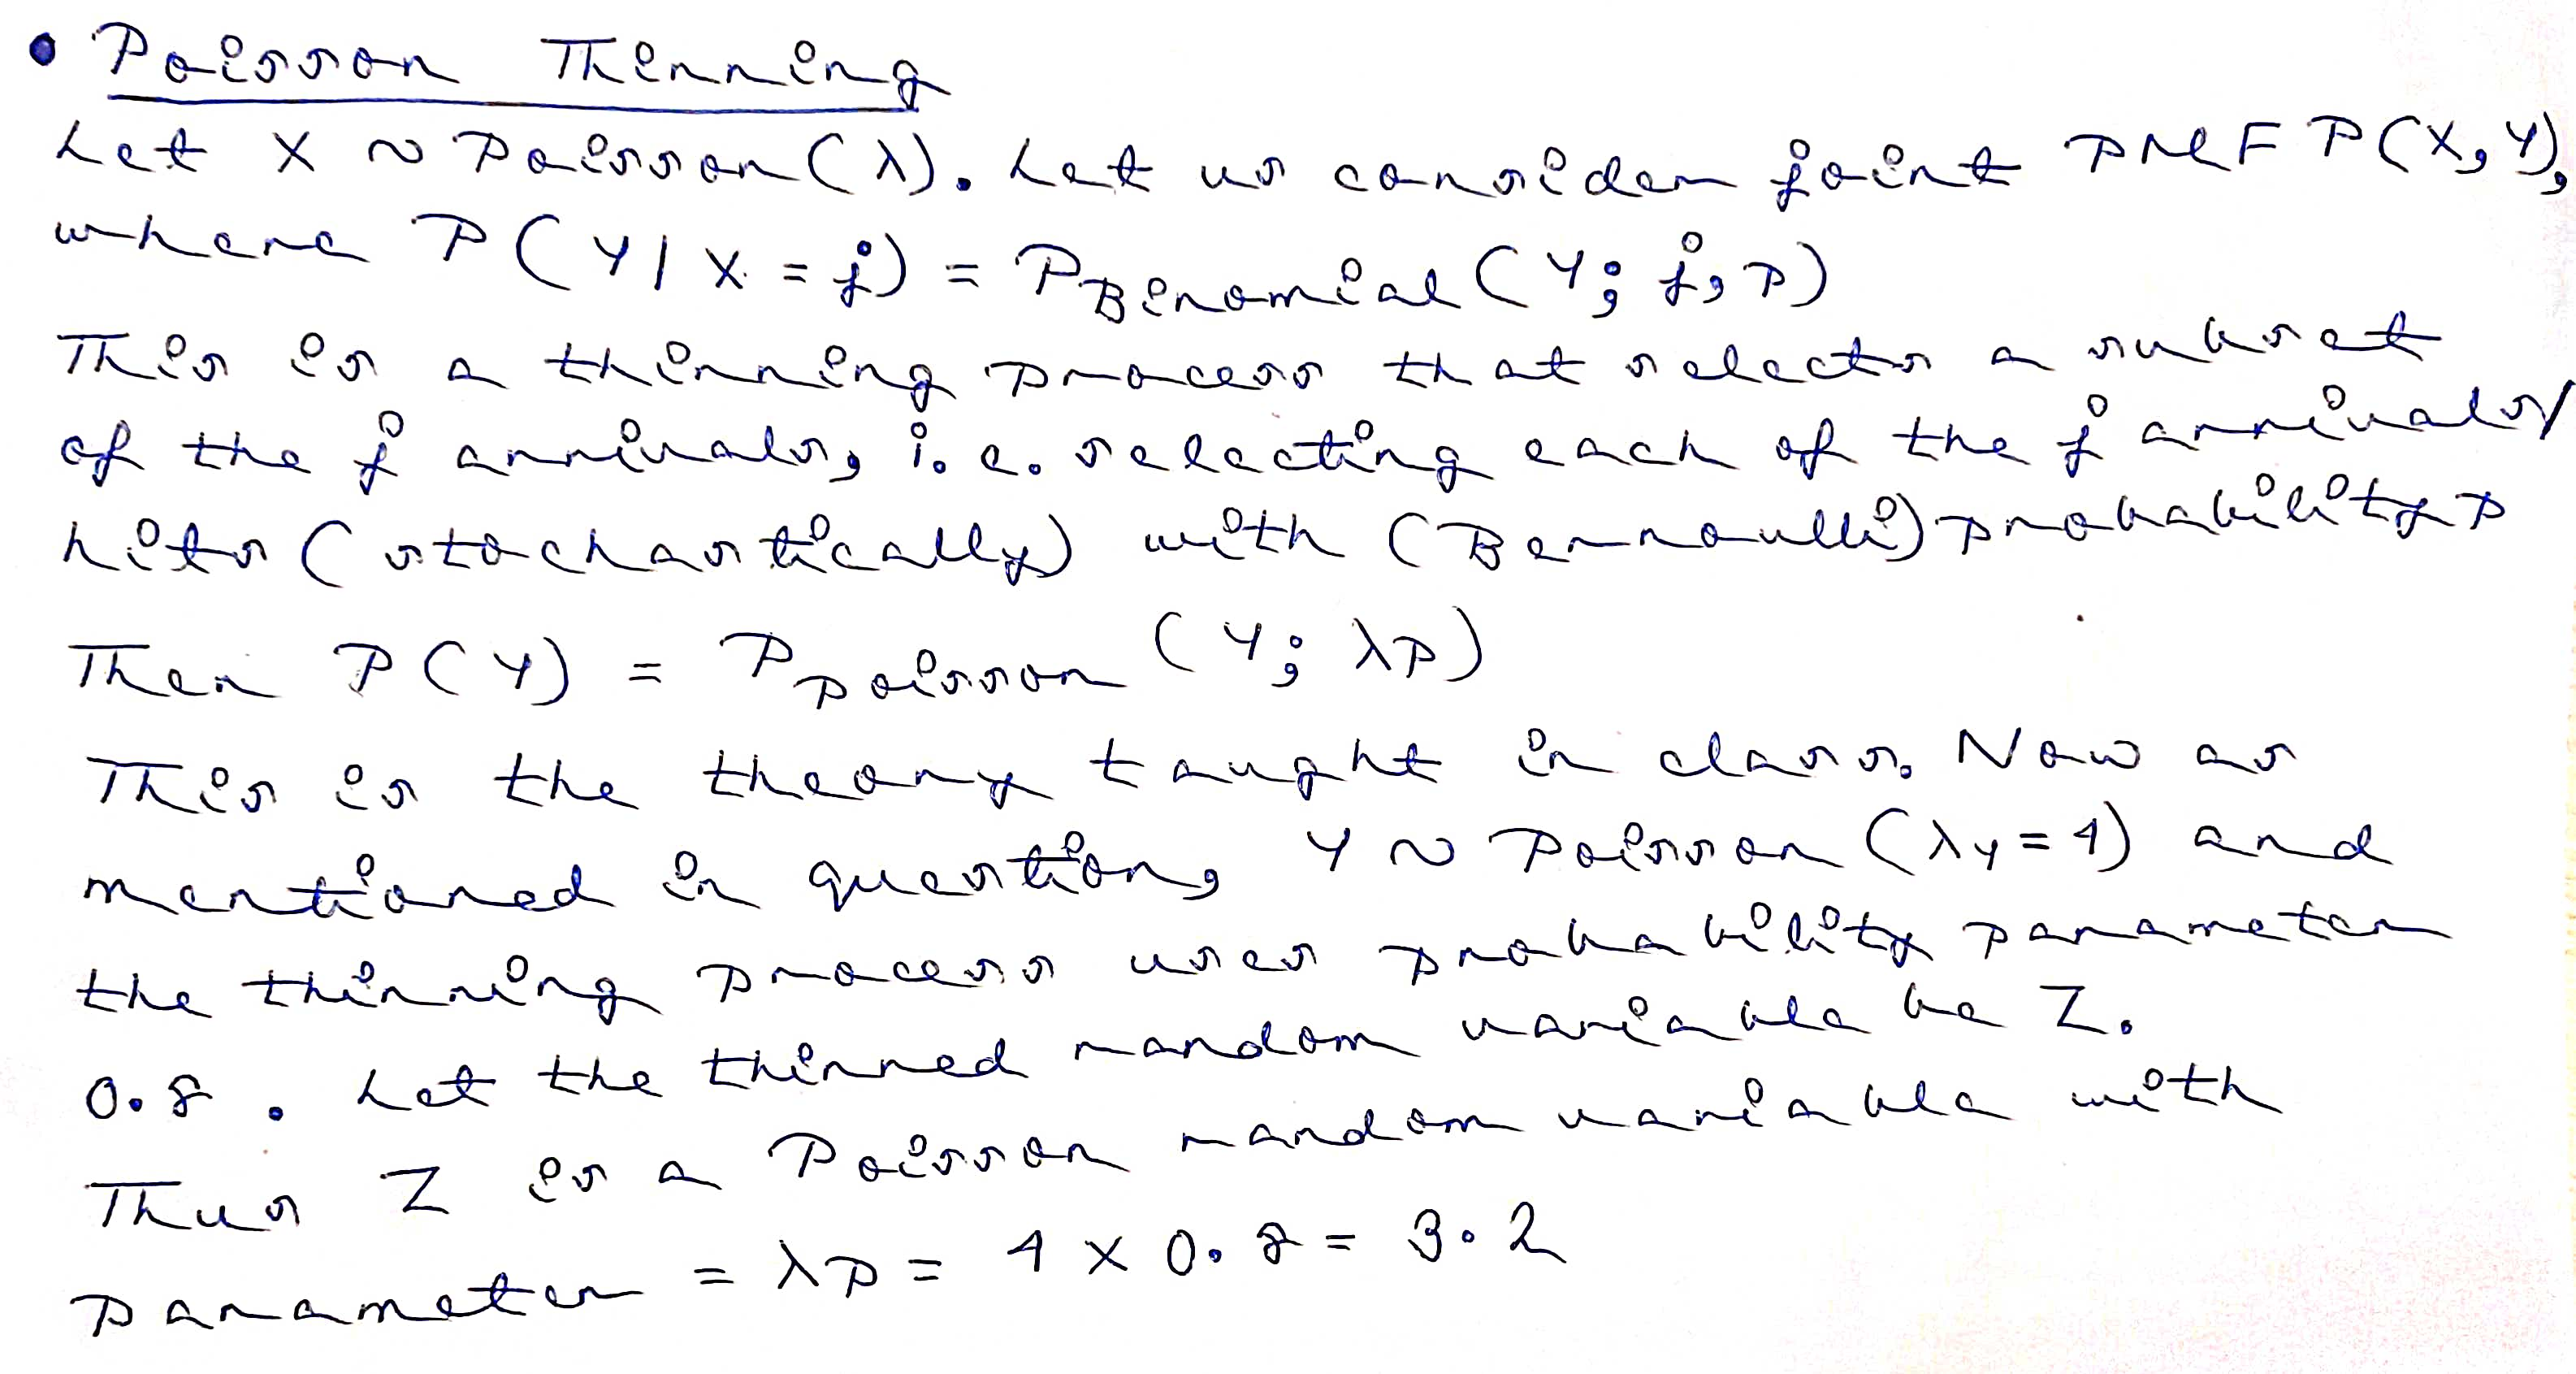

**(iii) Show and compare the values for estimated P(Z = k) and P(Z = k) for k = 0, 1, 2, · · · , 25.**

In [70]:
Z_distribution = {}
for x in range(0,26):
    Z_distribution[x]= Poisson(x,3.2)

In [71]:
report2['P(Z)'] = Z_distribution.values()
report2

,z,Estimated P(Z),P(Z)
0,0,0.03925,4.076220e-02
1,1,0.12884,1.304391e-01
2,2,0.20869,2.087025e-01
3,3,0.22239,2.226160e-01
4,4,0.17857,1.780928e-01
5,5,0.11540,1.139794e-01
6,6,0.06166,6.078900e-02
7,7,0.02828,2.778926e-02
8,8,0.01107,1.111570e-02
9,9,0.00397,3.952250e-03


In [73]:
report2.to_csv('Report2.csv')